# Throughput-F1score plot

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data=[['Baseline : FARM DenseBERT',91.56,144.5504481],
      ['DistilBERT',91.79,448.2294935],
      ['Distilbert mnli pruned80',90.71,416.6666667,68.96551724,131.5789474,263.1578947],
      ['Distilbert qqp pruned80',91.39,416.6666667,63.29113924,128.2051282,256.4102564],
      ['Obert mnli pruned80',89.59,222.2222222,56.17977528,116.2790698,232.5581395],
      ['Teacher: Bert-base-uncased',91.24,222.2222222,10.3950104,22.12389381,44.24778761],
      ['Student: 12layer pruned80',86.91,243.902439,29.58579882,61.34969325,122.6993865],
      ['Student: 12layer pruned90',86.5,250,40.48582996,84.74576271,169.4915254]]

In [3]:
df=pd.DataFrame(data,
                columns=['Models',
                         'F1_score',
                         'Throughput_GPU_1',
                         'Throughput_CPU_4',
                         'Throughput_CPU_8',
                         'Forecasted_Throughput_CPU_16'])

In [4]:
df

,Models,F1_score,Throughput_GPU_1,Throughput_CPU_4,Throughput_CPU_8,Forecasted_Throughput_CPU_16
0,Baseline : FARM DenseBERT,91.56,144.550448,NaN,NaN,NaN
1,DistilBERT,91.79,448.229493,NaN,NaN,NaN
2,Distilbert mnli pruned80,90.71,416.666667,68.965517,131.578947,263.157895
3,Distilbert qqp pruned80,91.39,416.666667,63.291139,128.205128,256.410256
4,Obert mnli pruned80,89.59,222.222222,56.179775,116.279070,232.558140
5,Teacher: Bert-base-uncased,91.24,222.222222,10.395010,22.123894,44.247788
6,Student: 12layer pruned80,86.91,243.902439,29.585799,61.349693,122.699387
7,Student: 12layer pruned90,86.50,250.000000,40.485830,84.745763,169.491525


In [5]:
df1 = pd.melt(df, id_vars=["Models", "F1_score"], value_name = "Throughput").sort_values('Models')

In [6]:
df1

,Models,F1_score,variable,Throughput
0,Baseline : FARM DenseBERT,91.56,Throughput_GPU_1,144.550448
16,Baseline : FARM DenseBERT,91.56,Throughput_CPU_8,NaN
8,Baseline : FARM DenseBERT,91.56,Throughput_CPU_4,NaN
24,Baseline : FARM DenseBERT,91.56,Forecasted_Throughput_CPU_16,NaN
25,DistilBERT,91.79,Forecasted_Throughput_CPU_16,NaN
9,DistilBERT,91.79,Throughput_CPU_4,NaN
17,DistilBERT,91.79,Throughput_CPU_8,NaN
1,DistilBERT,91.79,Throughput_GPU_1,448.229493
26,Distilbert mnli pruned80,90.71,Forecasted_Throughput_CPU_16,263.157895
18,Distilbert mnli pruned80,90.71,Throughput_CPU_8,131.578947


In [7]:
df1.rename(columns={'variable':'SysInfo'},inplace=True)
df0 = df1[df1.SysInfo!='Throughput_GPU_1'].sort_values(by='Throughput', ascending =True)

In [8]:
df0

,Models,F1_score,SysInfo,Throughput
13,Teacher: Bert-base-uncased,91.24,Throughput_CPU_4,10.395010
21,Teacher: Bert-base-uncased,91.24,Throughput_CPU_8,22.123894
14,Student: 12layer pruned80,86.91,Throughput_CPU_4,29.585799
15,Student: 12layer pruned90,86.50,Throughput_CPU_4,40.485830
29,Teacher: Bert-base-uncased,91.24,Forecasted_Throughput_CPU_16,44.247788
12,Obert mnli pruned80,89.59,Throughput_CPU_4,56.179775
22,Student: 12layer pruned80,86.91,Throughput_CPU_8,61.349693
11,Distilbert qqp pruned80,91.39,Throughput_CPU_4,63.291139
10,Distilbert mnli pruned80,90.71,Throughput_CPU_4,68.965517
23,Student: 12layer pruned90,86.50,Throughput_CPU_8,84.745763


In [9]:
df11 = df0[df0.Models=='Baseline:FARM DenseBERT'].sort_values(by='Throughput',ascending=True)
df22 = df0[df0.Models=='Obert mnli pruned80'].sort_values(by='Throughput',ascending=True)
df33 = df0[df0.Models=='Teacher: Bert-base-uncased'].sort_values(by='Throughput',ascending=True)
df44 = df0[df0.Models=='Student: 12layer pruned80'].sort_values(by='Throughput',ascending=True)
df55 = df0[df0.Models=='Student: 12layer pruned90'].sort_values(by='Throughput',ascending=True)
df66 = df0[df0.Models=='Distilbert mnli pruned80'].sort_values(by='Throughput',ascending=True)
df77 = df0[df0.Models=='Distilbert qqp pruned80'].sort_values(by='Throughput',ascending=True)
df88 = df0[df0.Models=='DistilBERT'].sort_values(by='Throughput',ascending=True)

In [10]:
df99 = df1[df1.SysInfo=='Throughput_GPU_1'].sort_values(by='Throughput',ascending=True)

In [11]:
df99

,Models,F1_score,SysInfo,Throughput
0,Baseline : FARM DenseBERT,91.56,Throughput_GPU_1,144.550448
4,Obert mnli pruned80,89.59,Throughput_GPU_1,222.222222
5,Teacher: Bert-base-uncased,91.24,Throughput_GPU_1,222.222222
6,Student: 12layer pruned80,86.91,Throughput_GPU_1,243.902439
7,Student: 12layer pruned90,86.50,Throughput_GPU_1,250.000000
2,Distilbert mnli pruned80,90.71,Throughput_GPU_1,416.666667
3,Distilbert qqp pruned80,91.39,Throughput_GPU_1,416.666667
1,DistilBERT,91.79,Throughput_GPU_1,448.229493


In [12]:
list(df99['Models'])

['Baseline : FARM DenseBERT',
 'Obert mnli pruned80',
 'Teacher: Bert-base-uncased',
 'Student: 12layer pruned80',
 'Student: 12layer pruned90',
 'Distilbert mnli pruned80',
 'Distilbert qqp pruned80',
 'DistilBERT']

In [13]:
df11

,Models,F1_score,SysInfo,Throughput


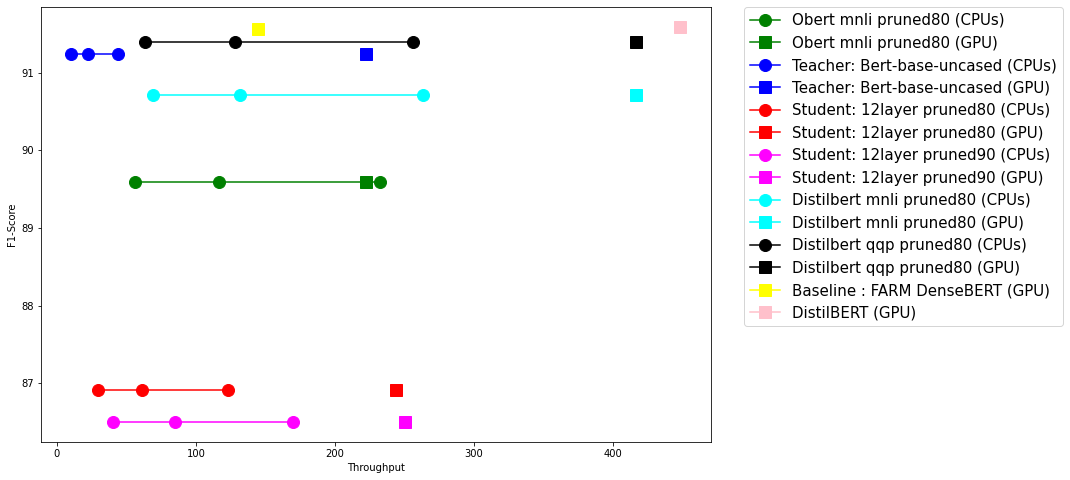

In [14]:
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.plot(df22['Throughput'], df22['F1_score'],
         label = df22['Models'],
         linestyle="-",
         marker='o',
         c='green',
         markersize=12,
         alpha=1)
plt.plot(222.22,
         89.59,
         c='green',
         marker='s',
         markersize=12)
plt.plot(df33['Throughput'],
         df33['F1_score'],
         label = df33['Models'],
         linestyle="-",
         marker='o',
         c='blue',
         markersize=12)
plt.plot(222.22,
         91.24,
         c='blue',
         marker='s',
         markersize=12)
plt.plot(df44['Throughput'],
         df44['F1_score'],
         label = df44['Models'],
         linestyle="-",
         marker='o',
         c='red',
         markersize=12)
plt.plot(243.90,
         86.91,
         c='red',
         marker='s',
         markersize=12)
plt.plot(df55['Throughput'],
         df55['F1_score'],
         label = df55['Models'],
         linestyle="-",
         marker='o',
         c='magenta',
         markersize=12)
plt.plot(250.0,
         86.50,
         c='magenta',
         marker='s',
         markersize=12)
plt.plot(df66['Throughput'],
         df66['F1_score'],
         label = df66['Models'],
         linestyle="-",
         marker='o',
         c='cyan',
         markersize=12)
plt.plot(416.6,
         90.71,
         c='cyan',
         marker='s',
         markersize=12)
plt.plot(df77['Throughput'],
         df77['F1_score'],
         label = df77['Models'],
         linestyle="-",
         marker='o',
         c='black',
         markersize=12)
plt.plot(416.6,
         91.39,
         c='black',
         marker='s',
         markersize=12)
plt.plot(144.5,
         91.56,
         c='yellow',
         marker='s',
         markersize=12,
         alpha=1)
plt.plot(448.2,
         91.59,
         c='pink',
         marker='s',
         markersize=12,
         alpha=1)
plt.legend(labels=['Obert mnli pruned80 (CPUs)','Obert mnli pruned80 (GPU)',
                   'Teacher: Bert-base-uncased (CPUs)','Teacher: Bert-base-uncased (GPU)',
                   'Student: 12layer pruned80 (CPUs)','Student: 12layer pruned80 (GPU)',
                   'Student: 12layer pruned90 (CPUs)','Student: 12layer pruned90 (GPU)',
                   'Distilbert mnli pruned80 (CPUs)','Distilbert mnli pruned80 (GPU)',
                   'Distilbert qqp pruned80 (CPUs)','Distilbert qqp pruned80 (GPU)',
                   'Baseline : FARM DenseBERT (GPU)','DistilBERT (GPU)'],
           bbox_to_anchor=(1.05, 1.0),
           loc='upper left',
           borderaxespad=0.,
           markerscale=1,
           fontsize=15)

plt.ylabel("F1-Score",
           rotation=90)
plt.xlabel("Throughput",
           rotation=0)
plt.savefig("Fig.pdf")
plt.show()


